# DSLabs functions

In [46]:
%run "scripts/dslabs_functions.py"


# Data functions

In [47]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [48]:
import pandas as pd
import numpy as np




file_tag = "Google Merch Store 2024-2025"



# test_data=True
test_data=False


filepath=r'data/df_merch_0_2024_agg_time_diff_input.csv'


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.75

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2024-01-06 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         425 non-null    float64
 1   Seven-day active users           425 non-null    float64
 2   28-day active users              425 non-null    float64
 3   Events per session               425 non-null    float64
 4   Add to baskets                   425 non-null    float64
 5   Checkouts                        425 non-null    float64
 6   E-commerce purchases             425 non-null    float64
 7   Average purchase revenue         425 non-null    float64
 8   Purchase revenue                 425 non-null    float64
 9   Average session duration         425 non-null    float64
 10  ARPU                             425 non-null    float64
 11  ARPPU                            425 non-null    float64
 12  Vie

# No Smoothing

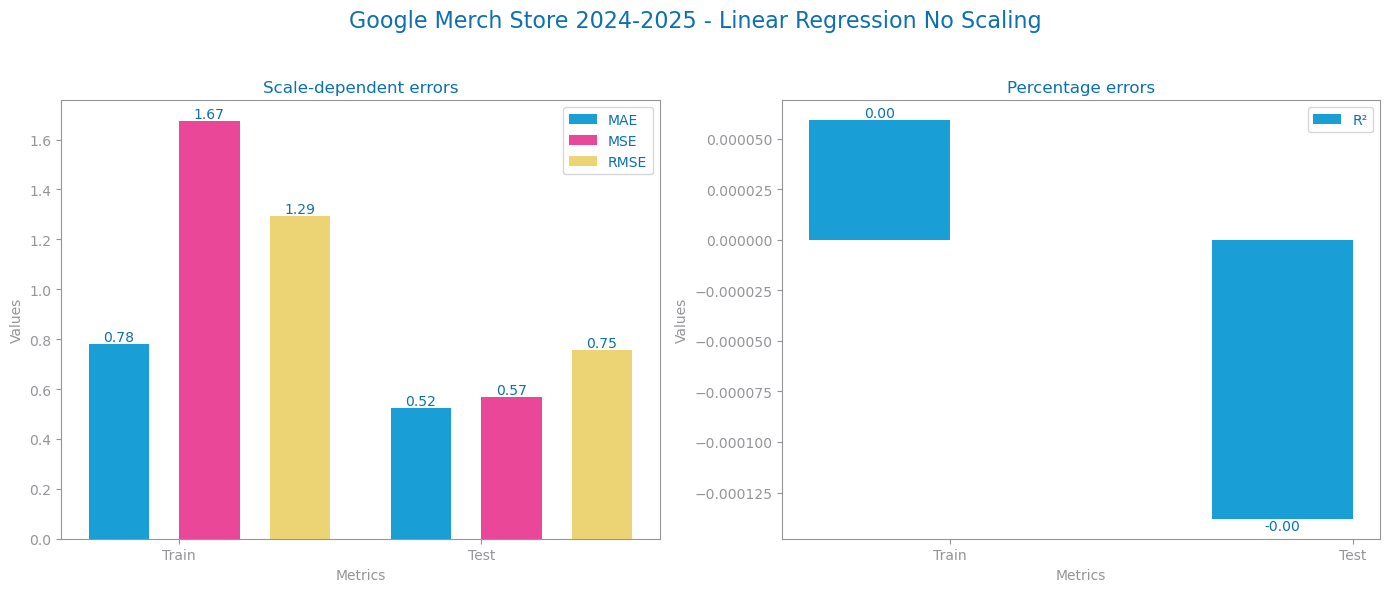

<Figure size 640x480 with 0 Axes>

In [49]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_smoothing.png")

## no smoothing plot

<Axes: xlabel='Date', ylabel='Sessions'>

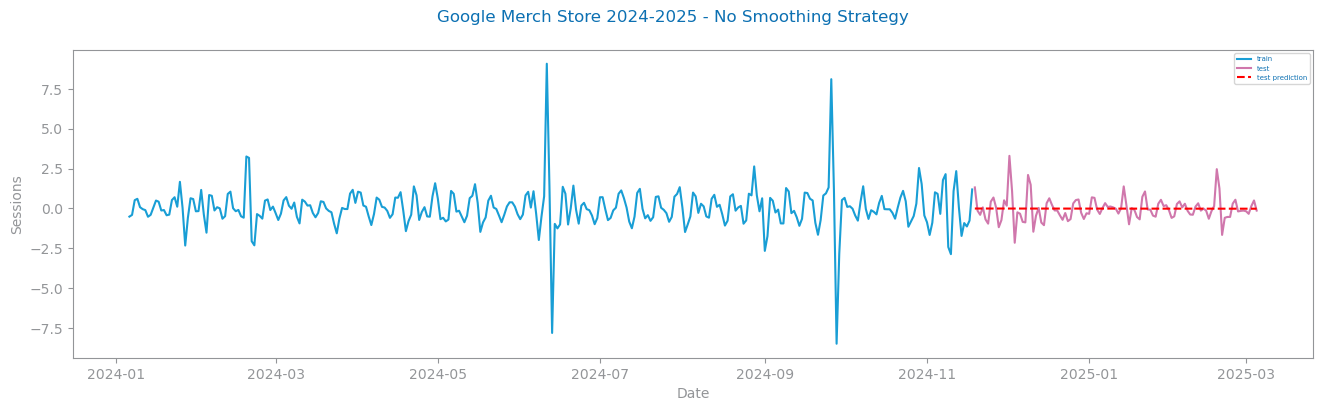

In [50]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Smoothing 1

## Smoothing 1 strategy Application

In [51]:

def apply_strategy_1(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    
    WIN_SIZE = 2
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_1,test_1=apply_strategy_1(data)

print(train_1.info())

print(test_1.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2024-01-07 to 2024-11-18
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         317 non-null    float64
 1   Seven-day active users           317 non-null    float64
 2   28-day active users              317 non-null    float64
 3   Events per session               317 non-null    float64
 4   Add to baskets                   317 non-null    float64
 5   Checkouts                        317 non-null    float64
 6   E-commerce purchases             317 non-null    float64
 7   Average purchase revenue         317 non-null    float64
 8   Purchase revenue                 317 non-null    float64
 9   Average session duration         317 non-null    float64
 10  ARPU                             317 non-null    float64
 11  ARPPU                            317 non-null    float64
 12  Vie

## Smoothing 1 Application evaluate

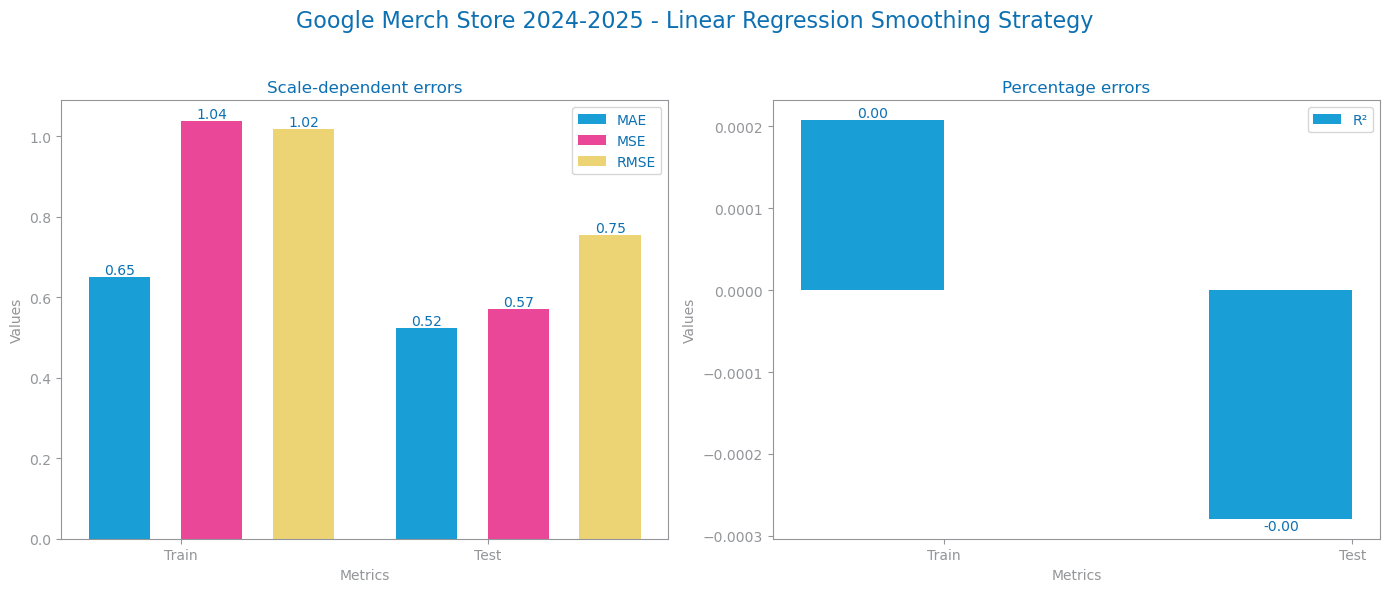

<Figure size 640x480 with 0 Axes>

In [52]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(train_1+test_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Smoothing Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing 1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

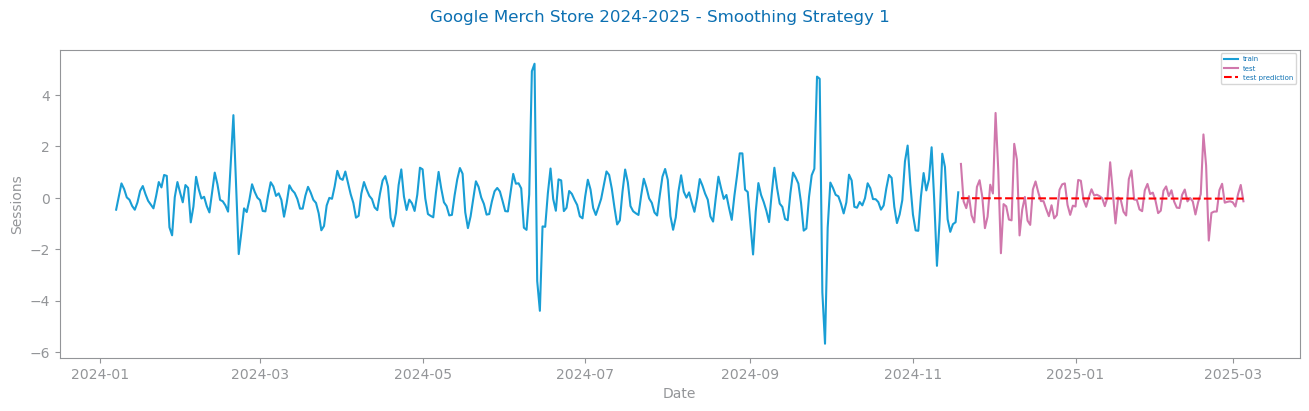

In [53]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Smoothing Strategy 1",
    xlabel='Date',
    ylabel=target,
)

# Smoothing 2

## Smoothing 2 Strategy Application

In [54]:
def apply_strategy_2(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    
    WIN_SIZE = 6
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_2,test_2=apply_strategy_2(data)

print(train_2.info())

print(test_2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313 entries, 2024-01-11 to 2024-11-18
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         313 non-null    float64
 1   Seven-day active users           313 non-null    float64
 2   28-day active users              313 non-null    float64
 3   Events per session               313 non-null    float64
 4   Add to baskets                   313 non-null    float64
 5   Checkouts                        313 non-null    float64
 6   E-commerce purchases             313 non-null    float64
 7   Average purchase revenue         313 non-null    float64
 8   Purchase revenue                 313 non-null    float64
 9   Average session duration         313 non-null    float64
 10  ARPU                             313 non-null    float64
 11  ARPPU                            313 non-null    float64
 12  Vie

## Smoothing 2 Eval

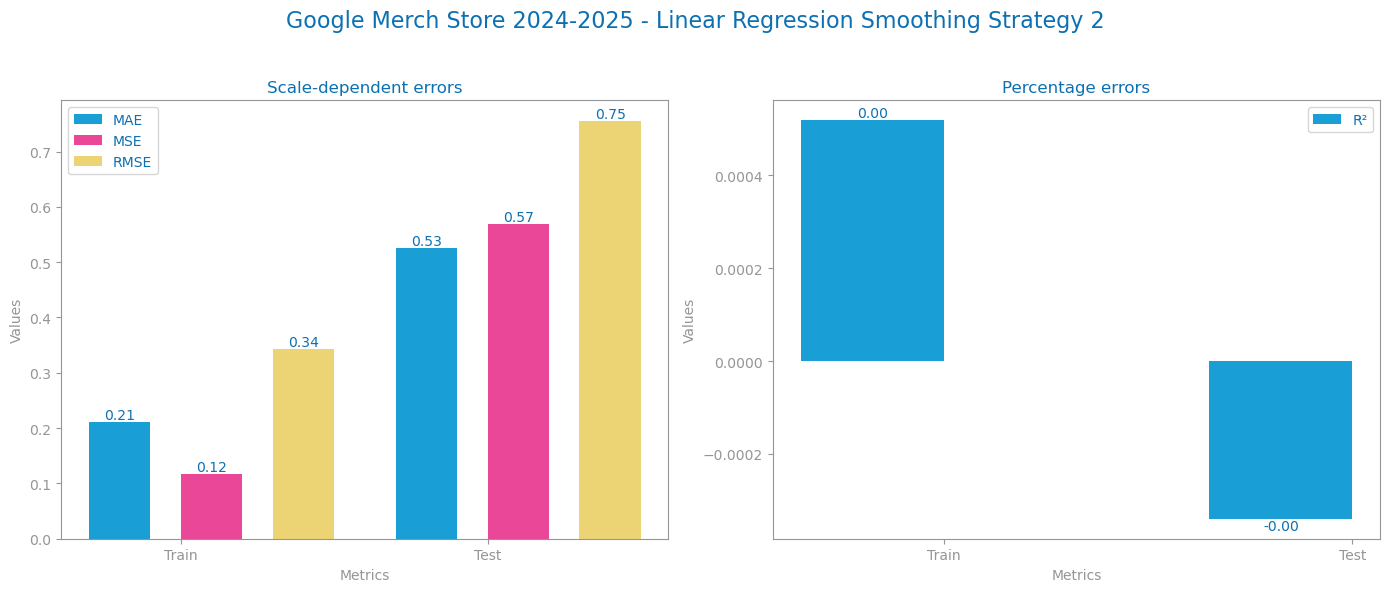

<Figure size 640x480 with 0 Axes>

In [55]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(train_2+test_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()


# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression Smoothing Strategy 2")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing 2 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

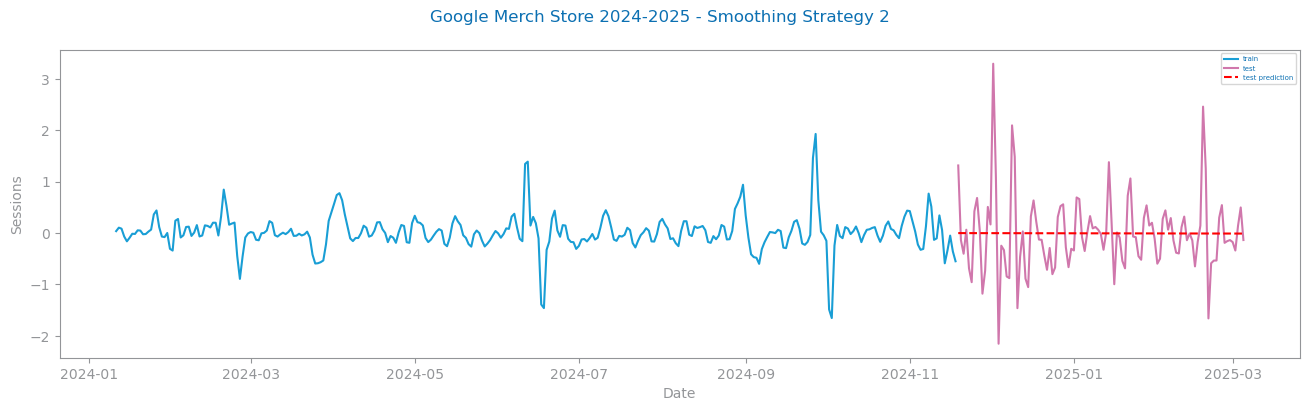

In [56]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Smoothing Strategy 2",
    xlabel='Date',
    ylabel=target,
)

# Smoothing 3 

## Smoothing 3 Strategy

In [57]:
def apply_strategy_3(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    
    WIN_SIZE = 10
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_3,test_3=apply_strategy_3(data)

print(train_3.info())

print(test_3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2024-01-15 to 2024-11-18
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         309 non-null    float64
 1   Seven-day active users           309 non-null    float64
 2   28-day active users              309 non-null    float64
 3   Events per session               309 non-null    float64
 4   Add to baskets                   309 non-null    float64
 5   Checkouts                        309 non-null    float64
 6   E-commerce purchases             309 non-null    float64
 7   Average purchase revenue         309 non-null    float64
 8   Purchase revenue                 309 non-null    float64
 9   Average session duration         309 non-null    float64
 10  ARPU                             309 non-null    float64
 11  ARPPU                            309 non-null    float64
 12  Vie

## Smoothing 3 Eval

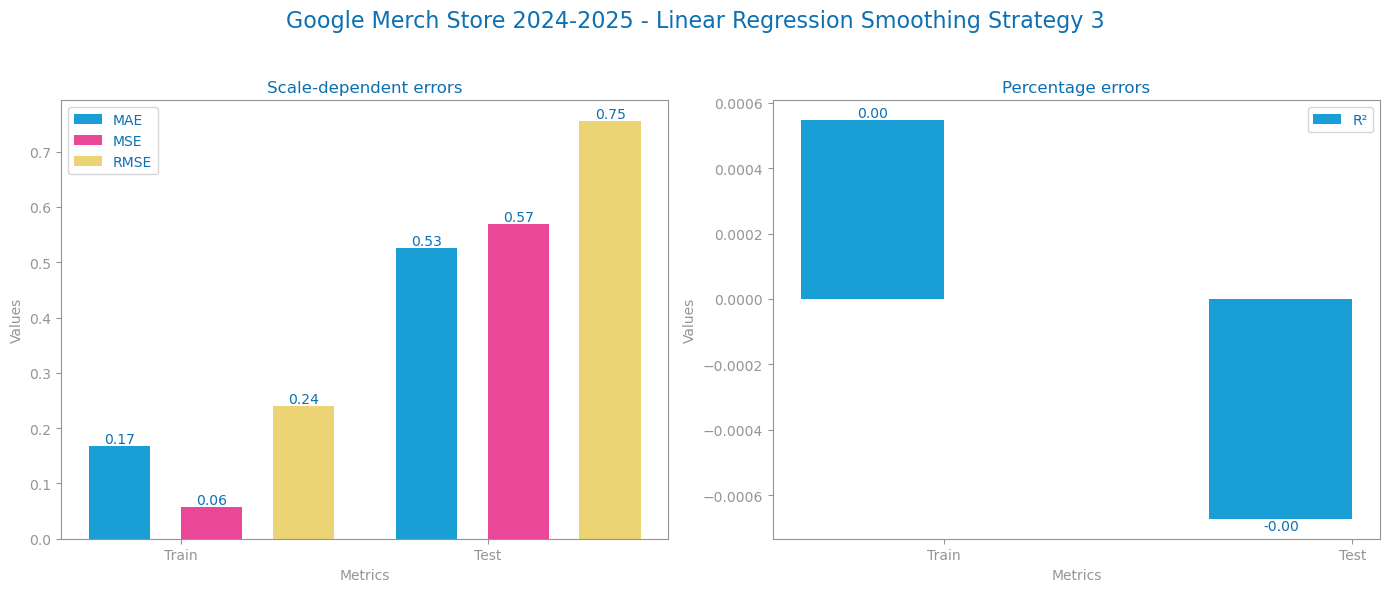

<Figure size 640x480 with 0 Axes>

In [58]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Prepare the training and testing data using the time index as the feature
trnX_3 = arange(len(train_3)).reshape(-1, 1)
trnY_3 = train_3[target].to_numpy()
tstX_3 = arange(len(train_3), len(train_3+test_3)).reshape(-1, 1)
tstY_3 = test_3[target].to_numpy()


# Fit the linear regression model
model_3 = LinearRegression()
model_3.fit(trnX_3, trnY_3)

# Predict the training and testing data
prd_trn_3 = Series(model_3.predict(trnX_3), index=train_3.index)
prd_tst_3 = Series(model_3.predict(tstX_3), index=test_3.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_3[target], test_3[target], prd_trn_3, prd_tst_3, title=f"{file_tag} - Linear Regression Smoothing Strategy 3")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing 3 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

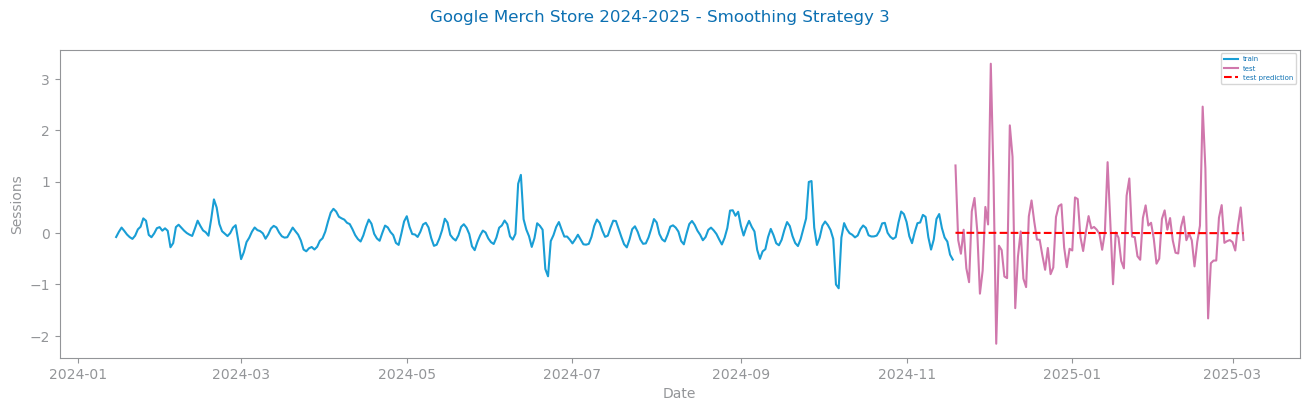

In [59]:
plot_forecasting_series(
    train_3[target],
    test_3[target],
    prd_tst_3,
    title=f"{file_tag} - Smoothing Strategy 3",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Smoothing", "Smoothing 1", "Smoothing 2", "Smoothing 3"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2),
        mean_absolute_error(test_3[target], prd_tst_3),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2),
        mean_squared_error(test_3[target], prd_tst_3),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False),
        mean_squared_error(test_3[target], prd_tst_3, squared=False),
        
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2),
        r2_score(test_3[target], prd_tst_3),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2),
        mean_absolute_percentage_error(test_3[target], prd_tst_3),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

          Model       MAE       MSE      RMSE        R²        MAPE
0  No Smoothing  0.524638  0.569707  0.754790 -0.000138  102.393379
1   Smoothing 1  0.523758  0.569788  0.754843 -0.000279  107.042918
2   Smoothing 2  0.525321  0.569822  0.754866 -0.000340  100.041158
3   Smoothing 3  0.526024  0.570012  0.754991 -0.000673   99.577959


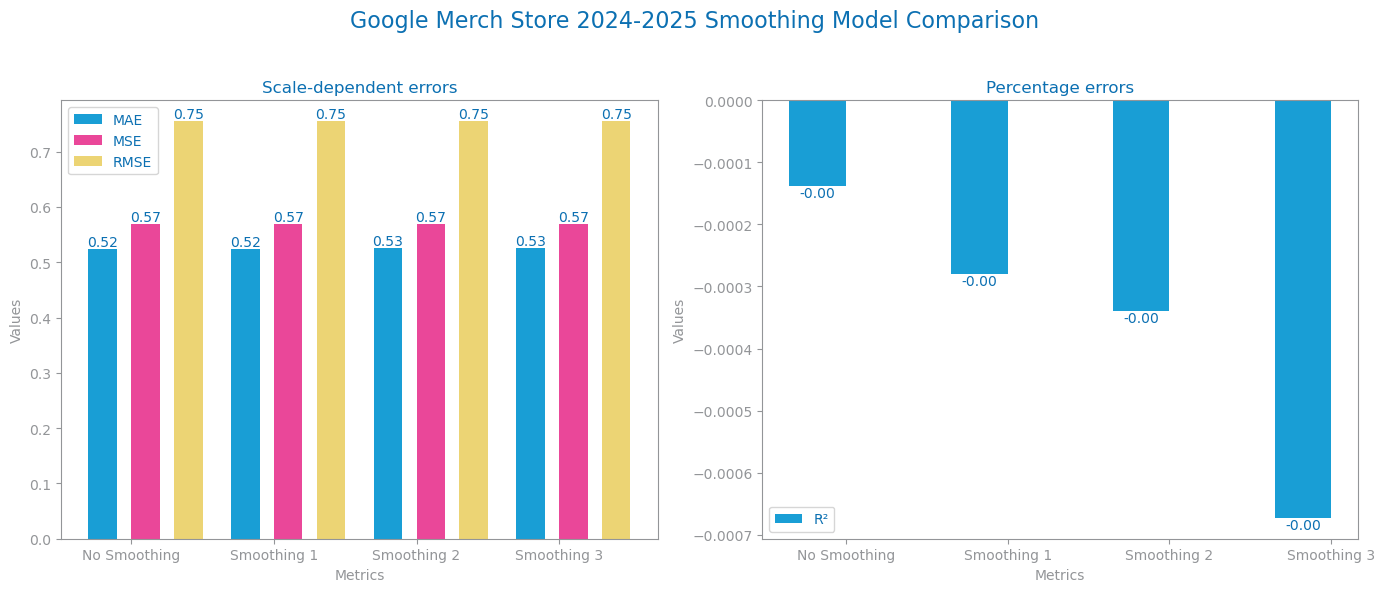

In [61]:
plot_performance_metrics(metrics, title=f"{file_tag} Smoothing Model Comparison")

# save to csv

In [63]:
if test_data==False:
    

    data_save=data.copy()

    # if no smoothing was applied, the train and test data are the same
    data_copy=pd.read_csv(filepath)     
    train_save, test_save = series_train_test_split(data_copy, trn_pct=test_split_threshold)


    # apply smoothing strategy
    # train_save,test_save=apply_strategy_1(data)
    # train_save.reset_index(inplace=True) # only if smoothing applied
    # test_save.reset_index(inplace=True) # only if smoothing applied


    train_save.to_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", index=False)
  
    

    test_save.to_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", index=False)
          

    print(train_save.columns)
    print(test_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess